In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("../data/processed/cleaned_features_test.csv")

# 생물학적 순서 정의 (그래프 그릴 때 계속 쓸 거야)
bio_order = ['Resting', 'Undetermined_2', 'Proliferative', 'Undetermined_1', 'Hypertrophic']

print(f"📊 분석 준비 완료: {df.shape[0]}개의 세포와 {df.shape[1]}개의 피처")

📊 분석 준비 완료: 5305개의 세포와 19개의 피처


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification               5305 non-null   object 
 1   Area µm^2                    5305 non-null   float64
 2   Length µm                    5305 non-null   float64
 3   Circularity                  5305 non-null   float64
 4   Solidity                     5305 non-null   float64
 5   Min diameter µm              5305 non-null   float64
 6   Hematoxylin: Mean            5305 non-null   float64
 7   Hematoxylin: Min             5305 non-null   float64
 8   Hematoxylin: Max             5305 non-null   float64
 9   Hematoxylin: Std.Dev.        5305 non-null   float64
 10  DAB: Mean                    5305 non-null   float64
 11  DAB: Median                  5305 non-null   float64
 12  DAB: Min                     5305 non-null   float64
 13  DAB: Max          

C:\Users\apple\AppData\Local\Temp\ipykernel_17600\1398374093.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Classification', order=bio_order, palette='viridis')


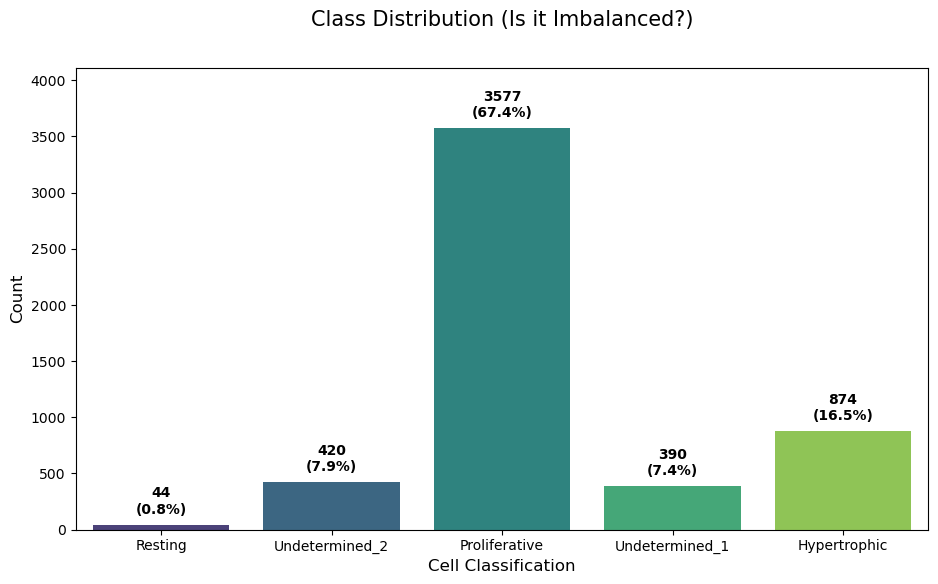

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 그래프 크기 설정
plt.figure(figsize=(11, 6))

# 2. 바 차트 그리기
ax = sns.countplot(data=df, x='Classification', order=bio_order, palette='viridis')

# 3. 제목 설정 (pad 옵션으로 간격 추가)
plt.title('Class Distribution (Is it Imbalanced?)', fontsize=15, pad=30)

# 4. y축 범위 넉넉하게 설정 (텍스트가 들어갈 공간 확보)
# 현재 데이터 중 가장 큰 값의 1.15배 정도로 설정해
max_count = df['Classification'].value_counts().max()
plt.ylim(0, max_count * 1.15)

# 5. 바 위에 숫자와 비율 표시
for i, v in enumerate(df['Classification'].value_counts().reindex(bio_order)):
    # 텍스트가 바 바로 위에 예쁘게 올라가도록 위치 조정
    plt.text(i, v + (max_count * 0.02), f"{v}\n({v/len(df)*100:.1f}%)", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Cell Classification', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

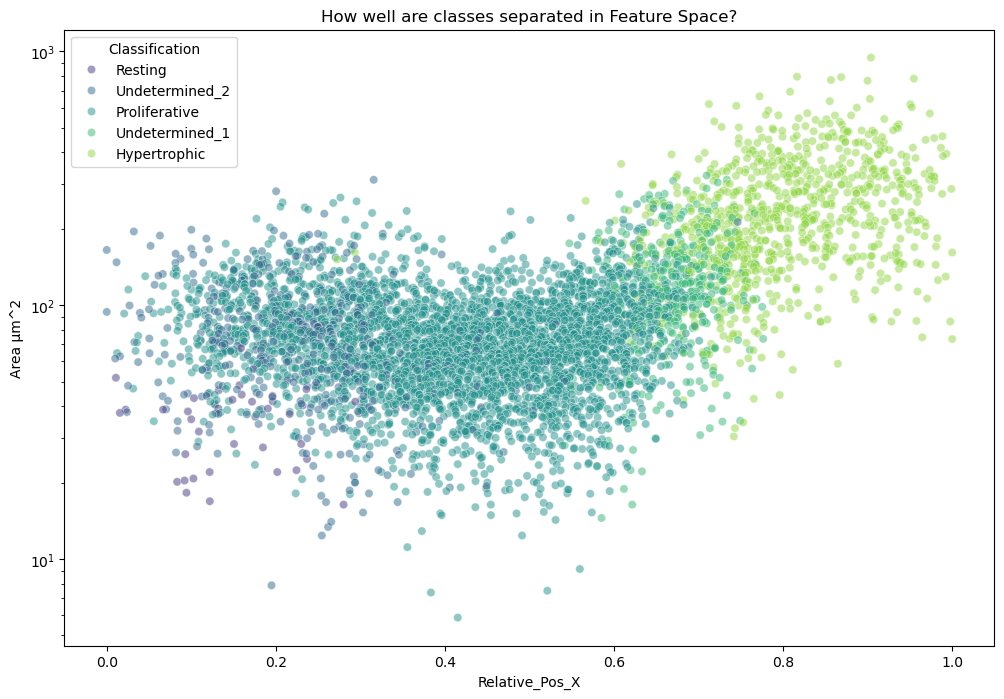

In [4]:
# Relative_Pos_X와 Area의 관계를 클래스별로 확인
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Relative_Pos_X', y='Area µm^2', 
                hue='Classification', hue_order=bio_order, 
                alpha=0.5, palette='viridis')
plt.yscale('log') # Area의 편차가 크니까 로그 스케일로!
plt.title('How well are classes separated in Feature Space?')
plt.show()